In [1]:
# pip install yellowbrick

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report
from yellowbrick.model_selection import rfecv
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import seaborn as sns
sns.set_theme(style='darkgrid', palette='rainbow')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('Glass.csv')

In [4]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


<Axes: >

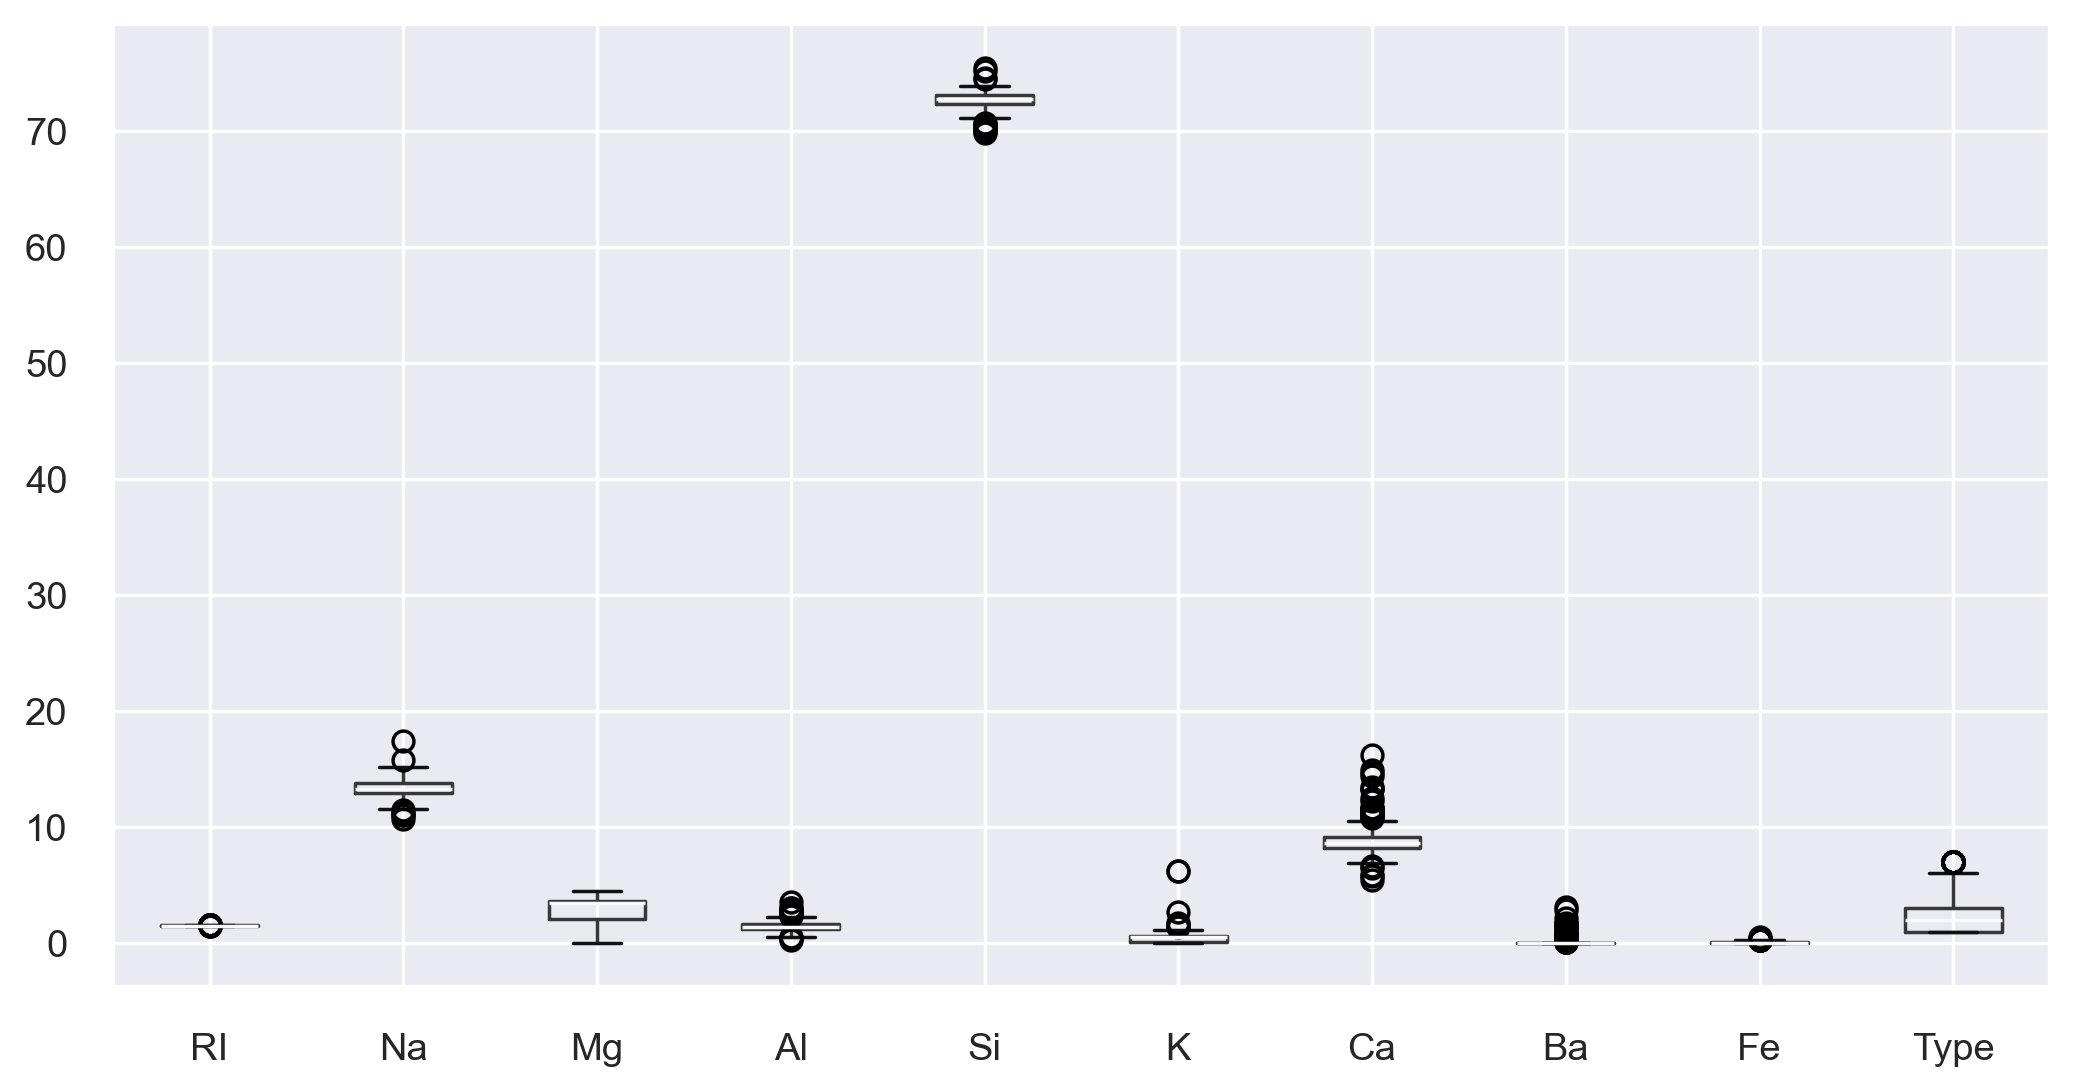

In [5]:
df.boxplot()

In [6]:
def outlier_replace(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

    return df

In [37]:
df = outlier_replace(df, 'RI')
df = outlier_replace(df, 'Na')
df = outlier_replace(df, 'Al')
df = outlier_replace(df, 'K')
df = outlier_replace(df, 'Ca')
df = outlier_replace(df, 'Ba')
df = outlier_replace(df, 'Si')
df = outlier_replace(df, 'Fe')
df = outlier_replace(df, 'Type')

<Axes: >

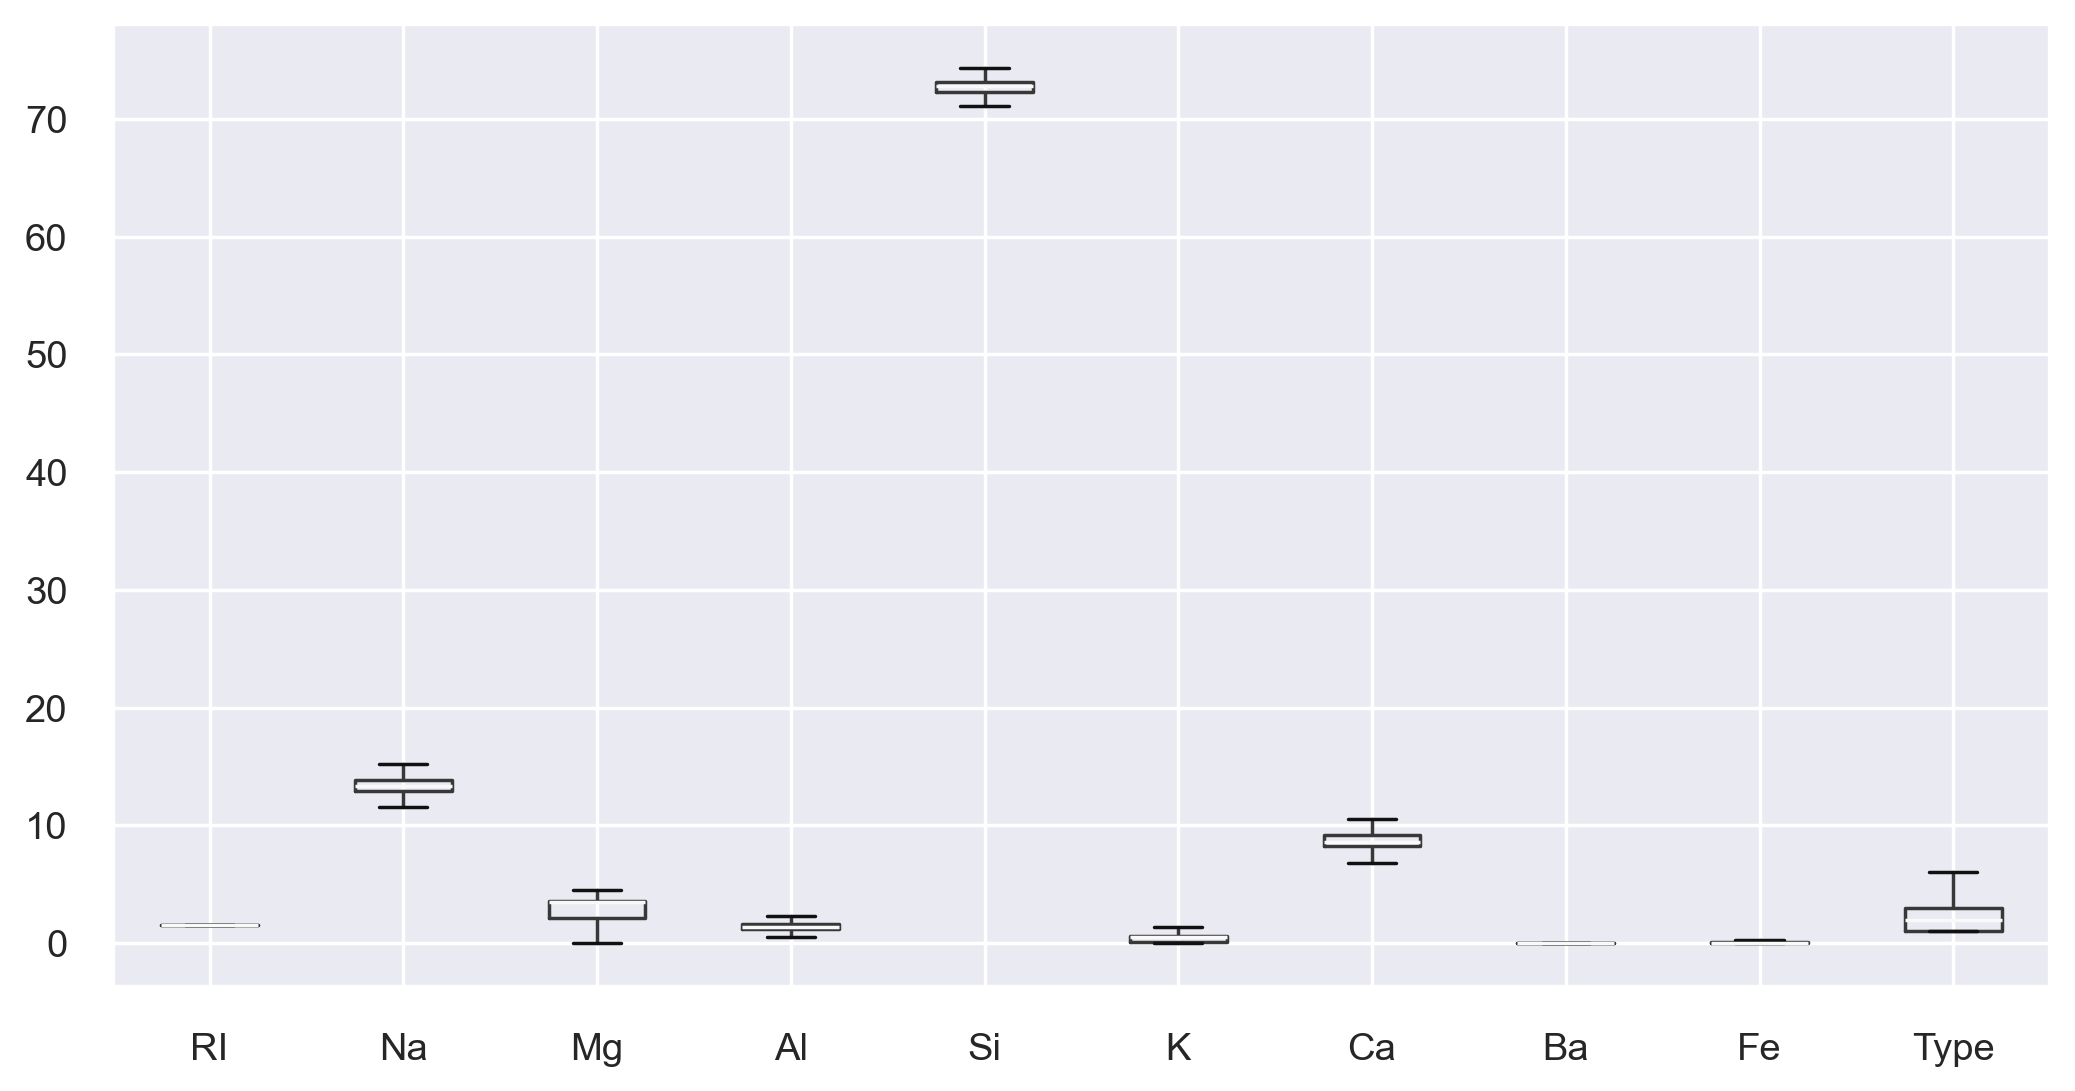

In [38]:
df.boxplot()

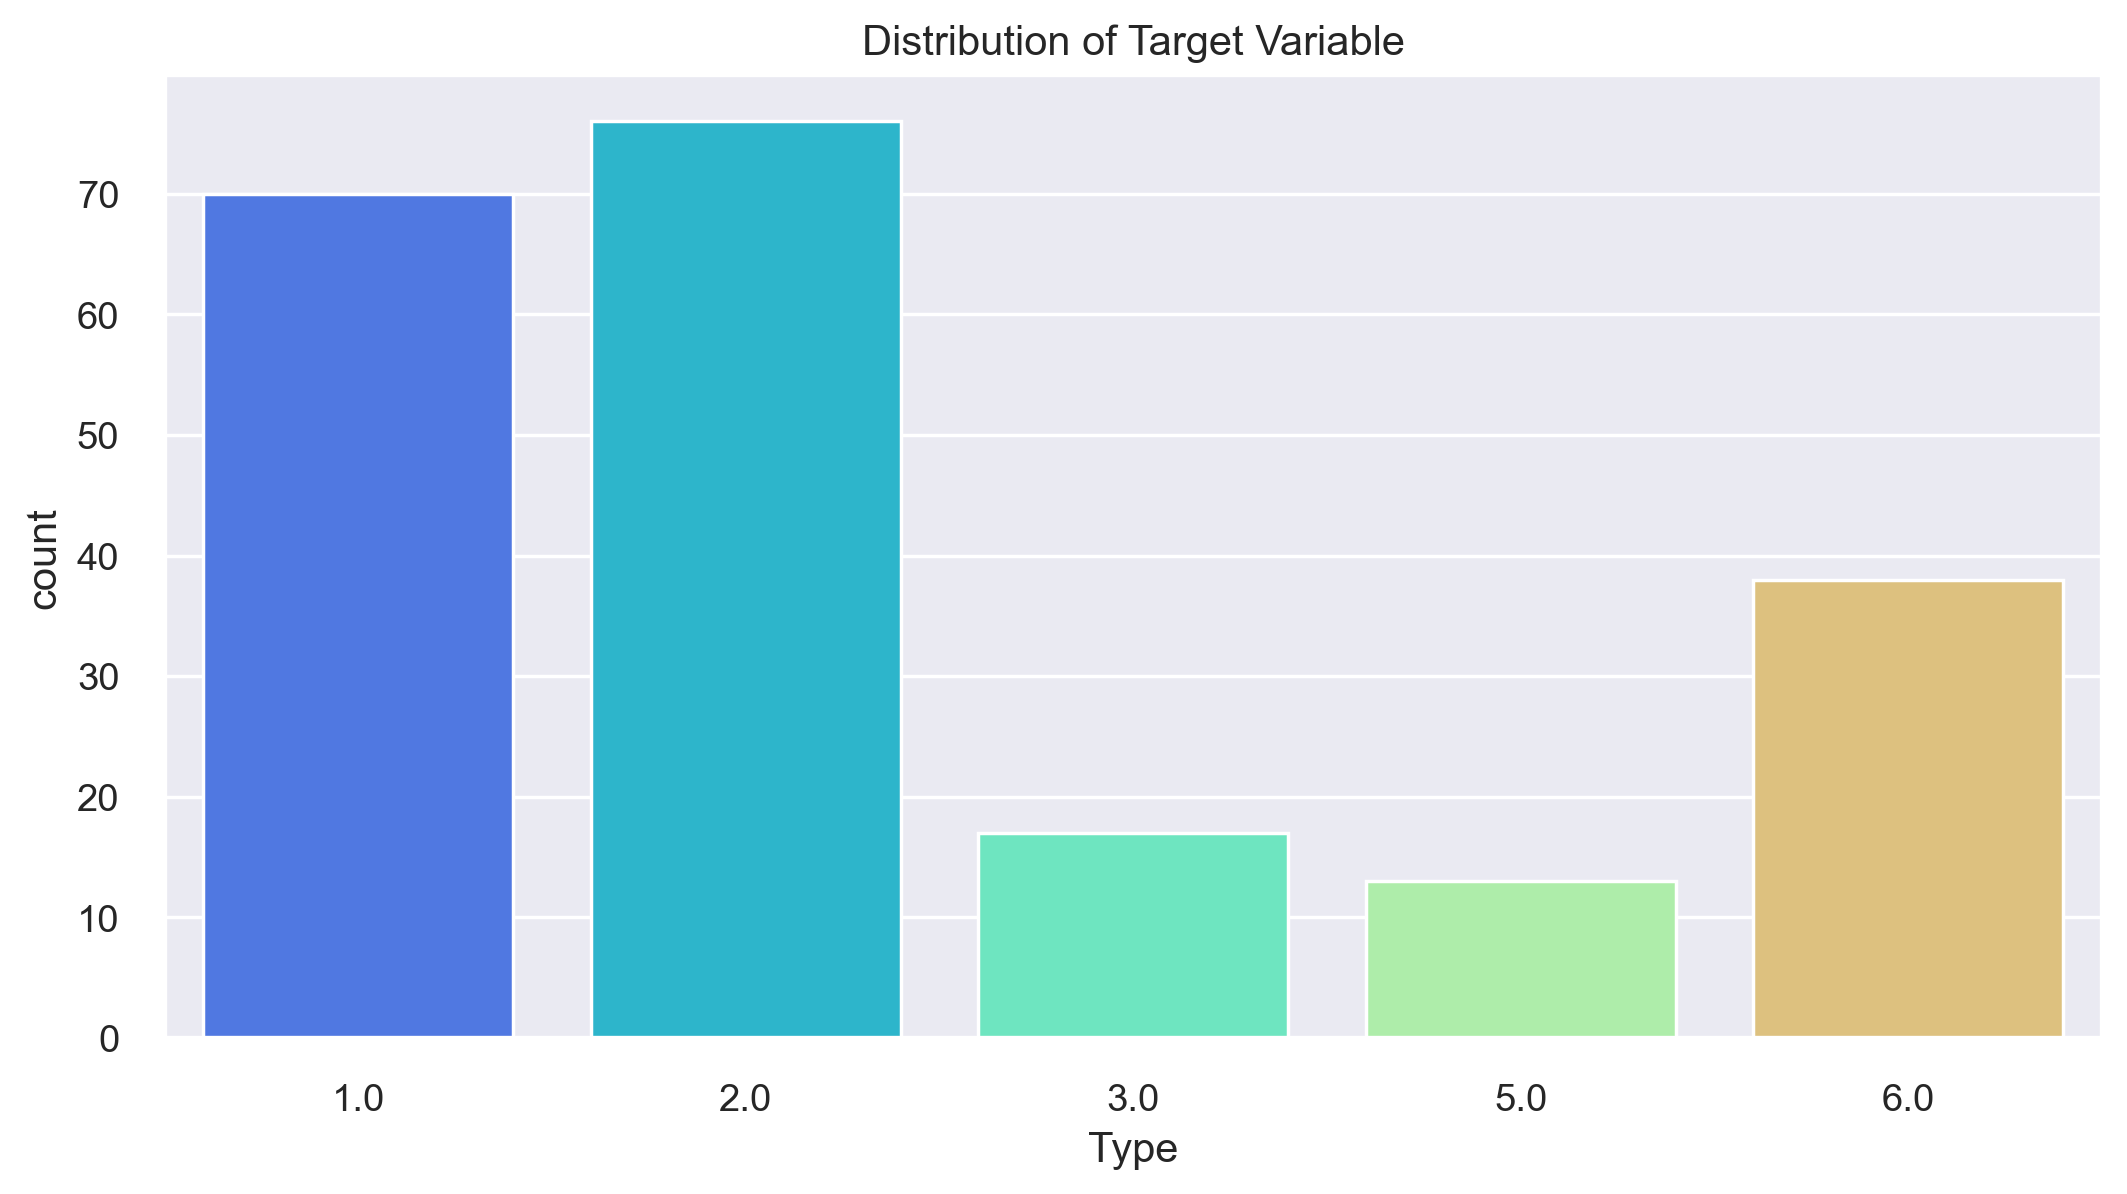

In [9]:
sns.countplot(x='Type', data=df)
plt.title('Distribution of Target Variable')
plt.show()


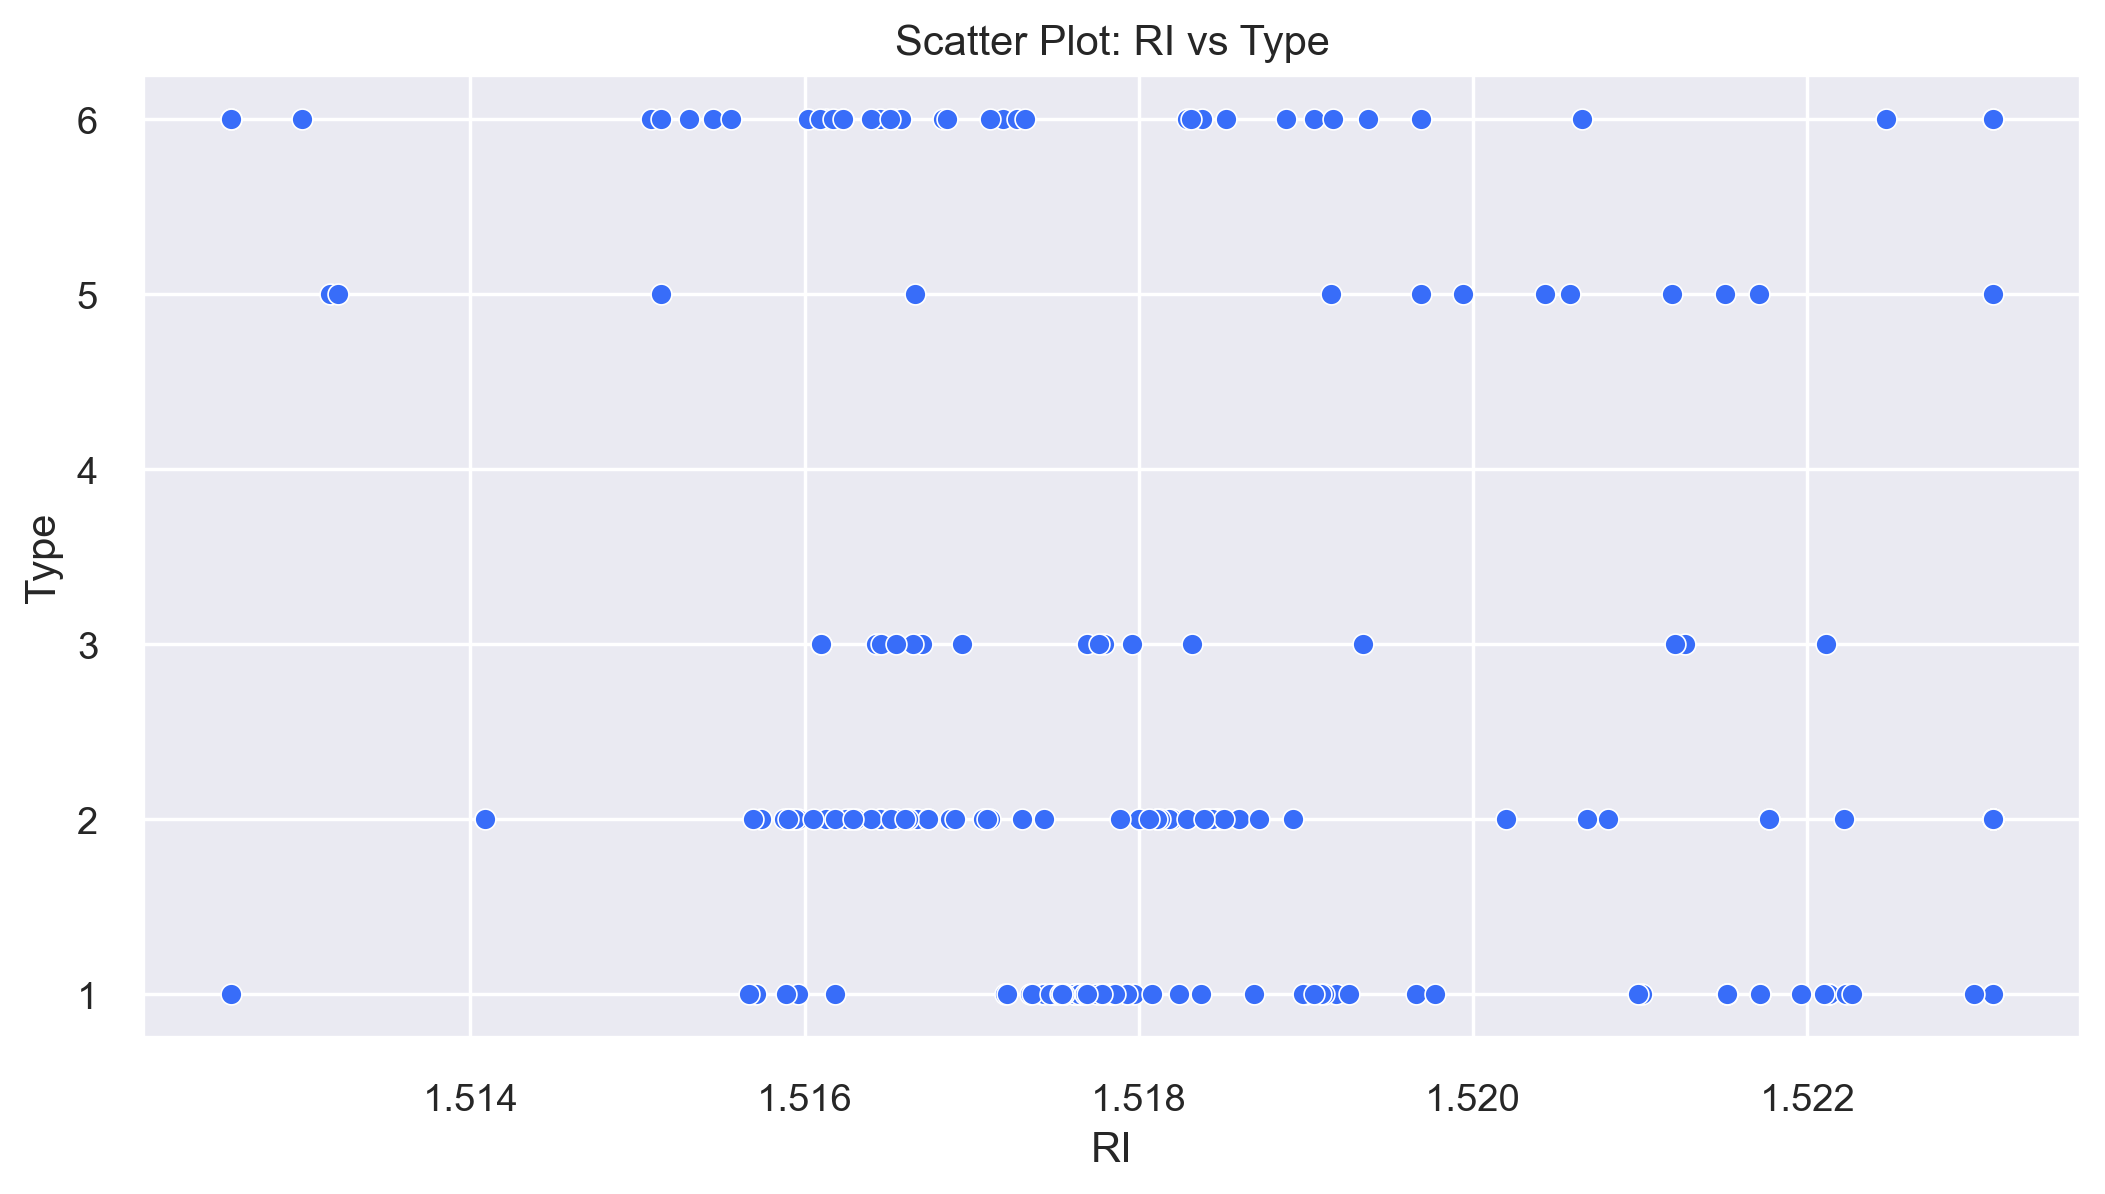

In [10]:
sns.scatterplot(x='RI', y='Type', data=df)
plt.title('Scatter Plot: RI vs Type')
plt.xlabel('RI')
plt.ylabel('Type')
plt.show()

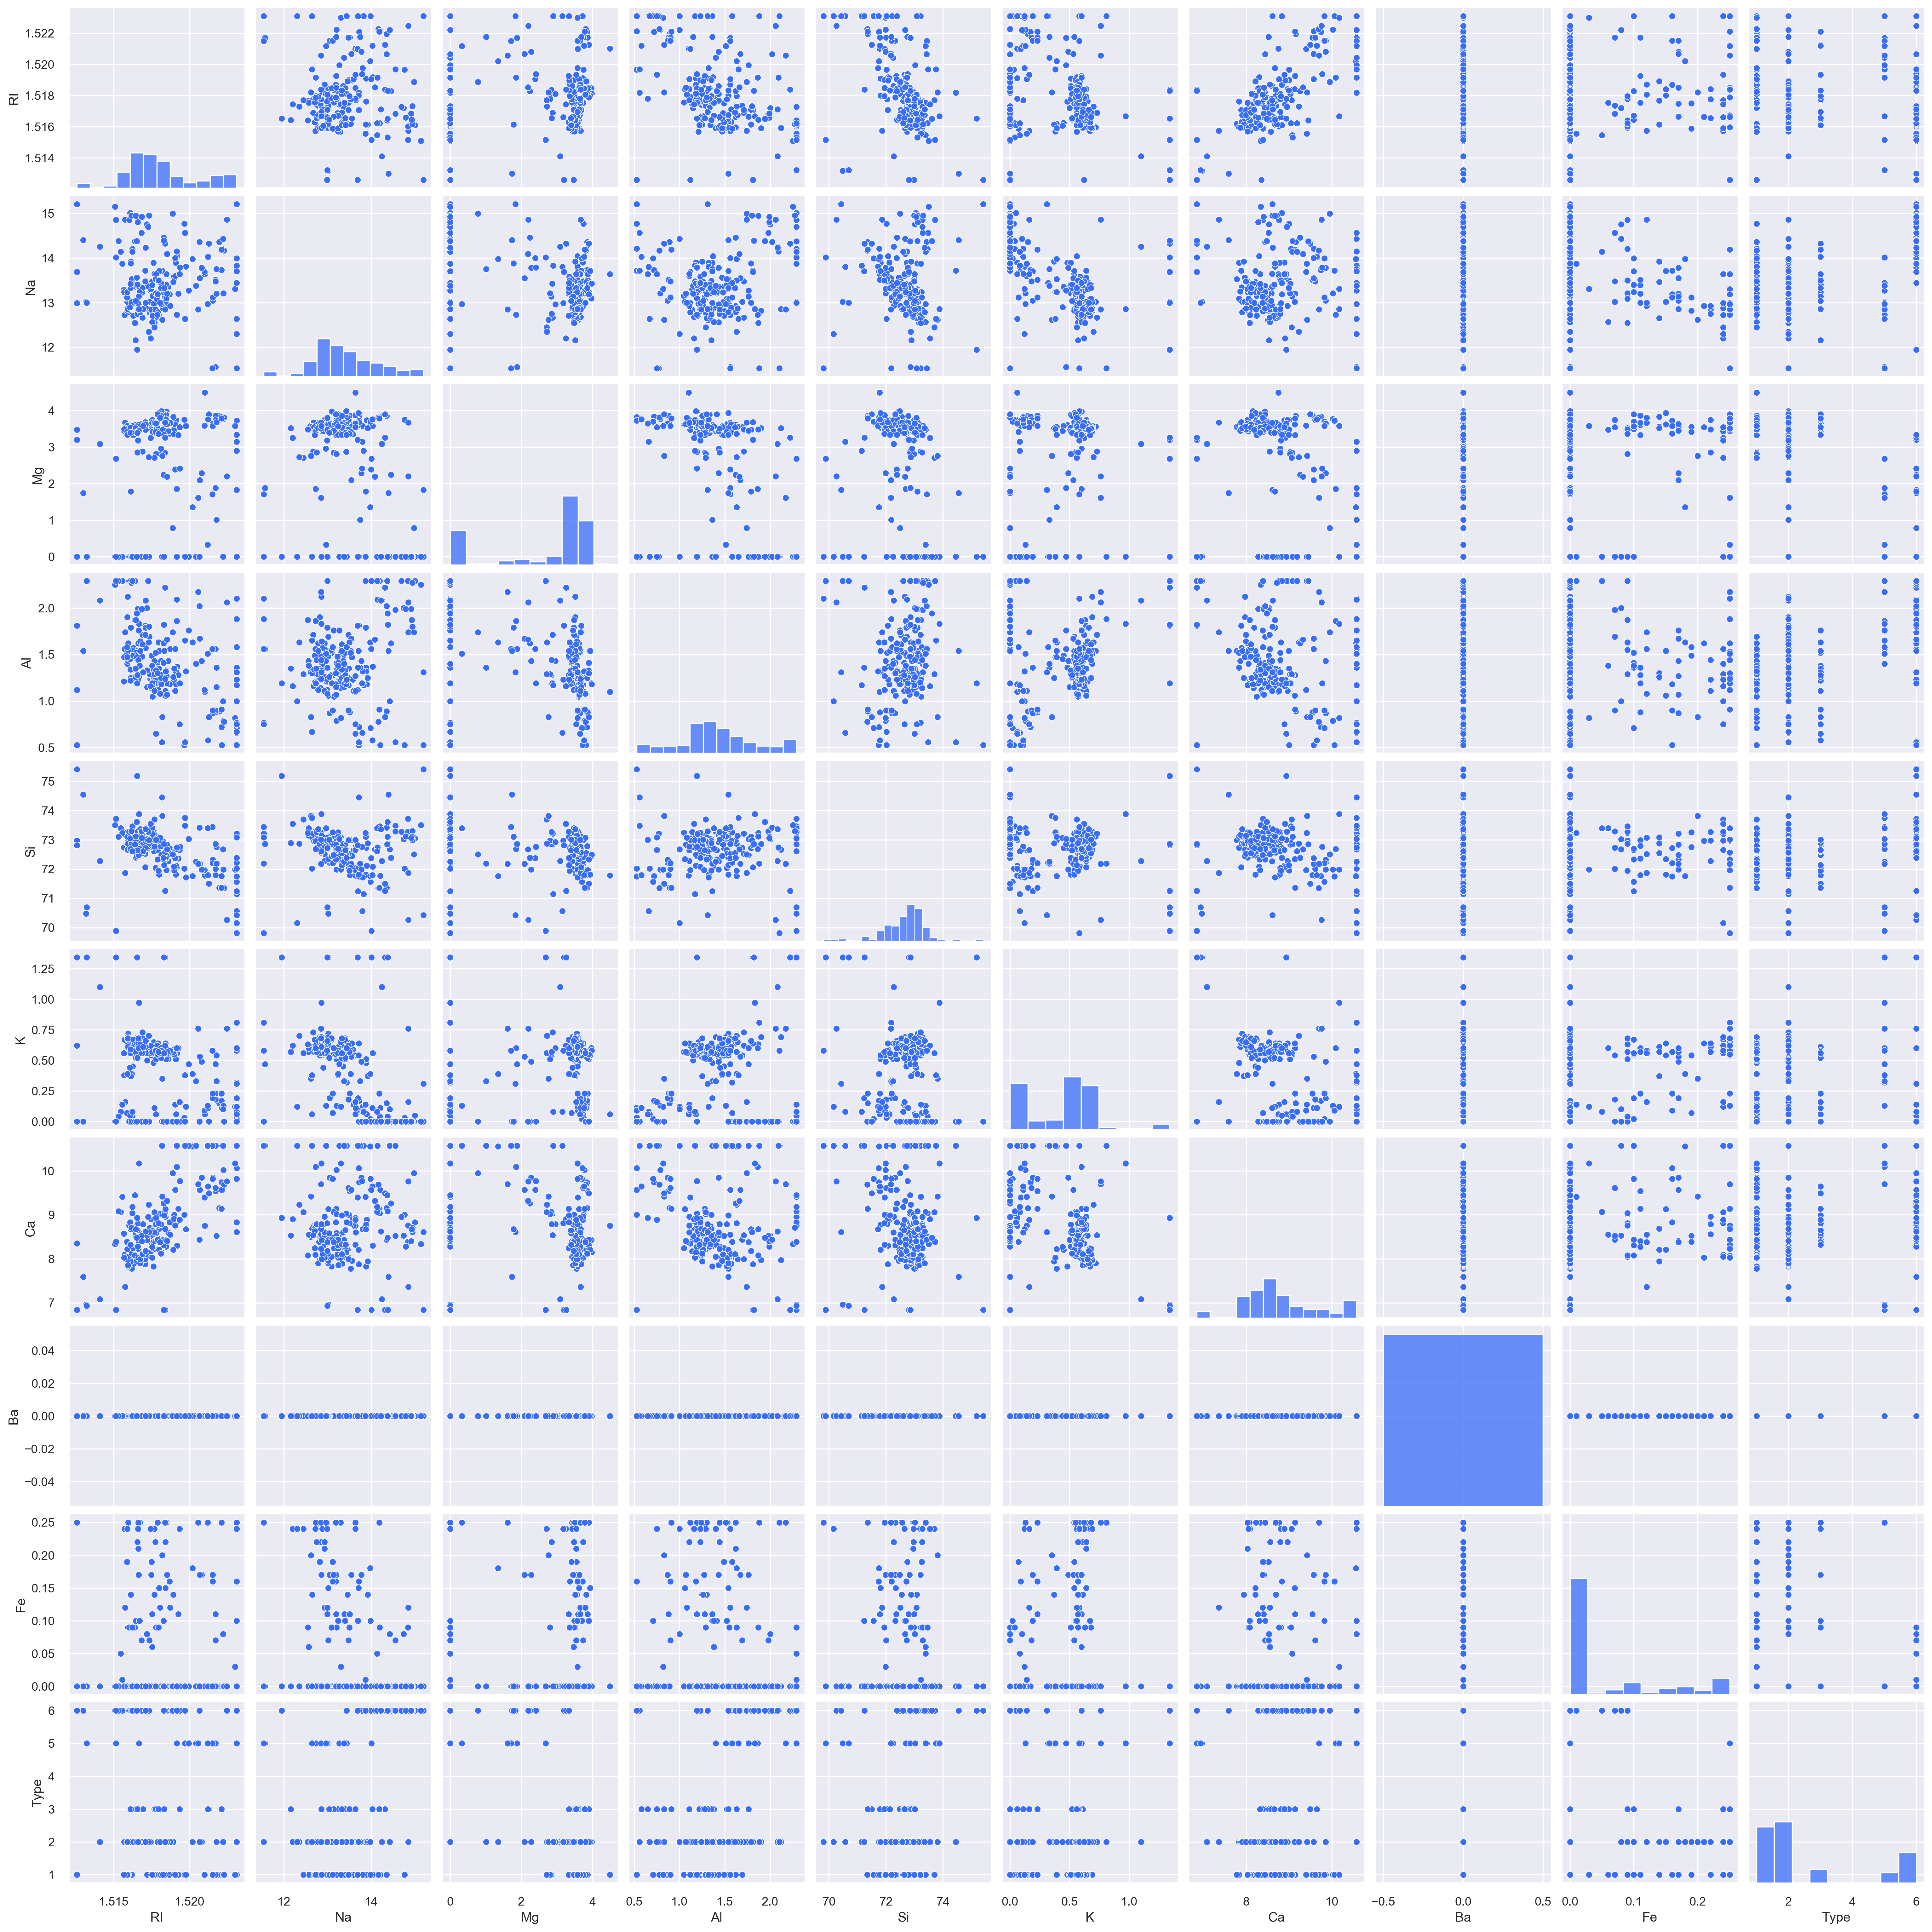

In [11]:
sns.pairplot(df)
plt.show()

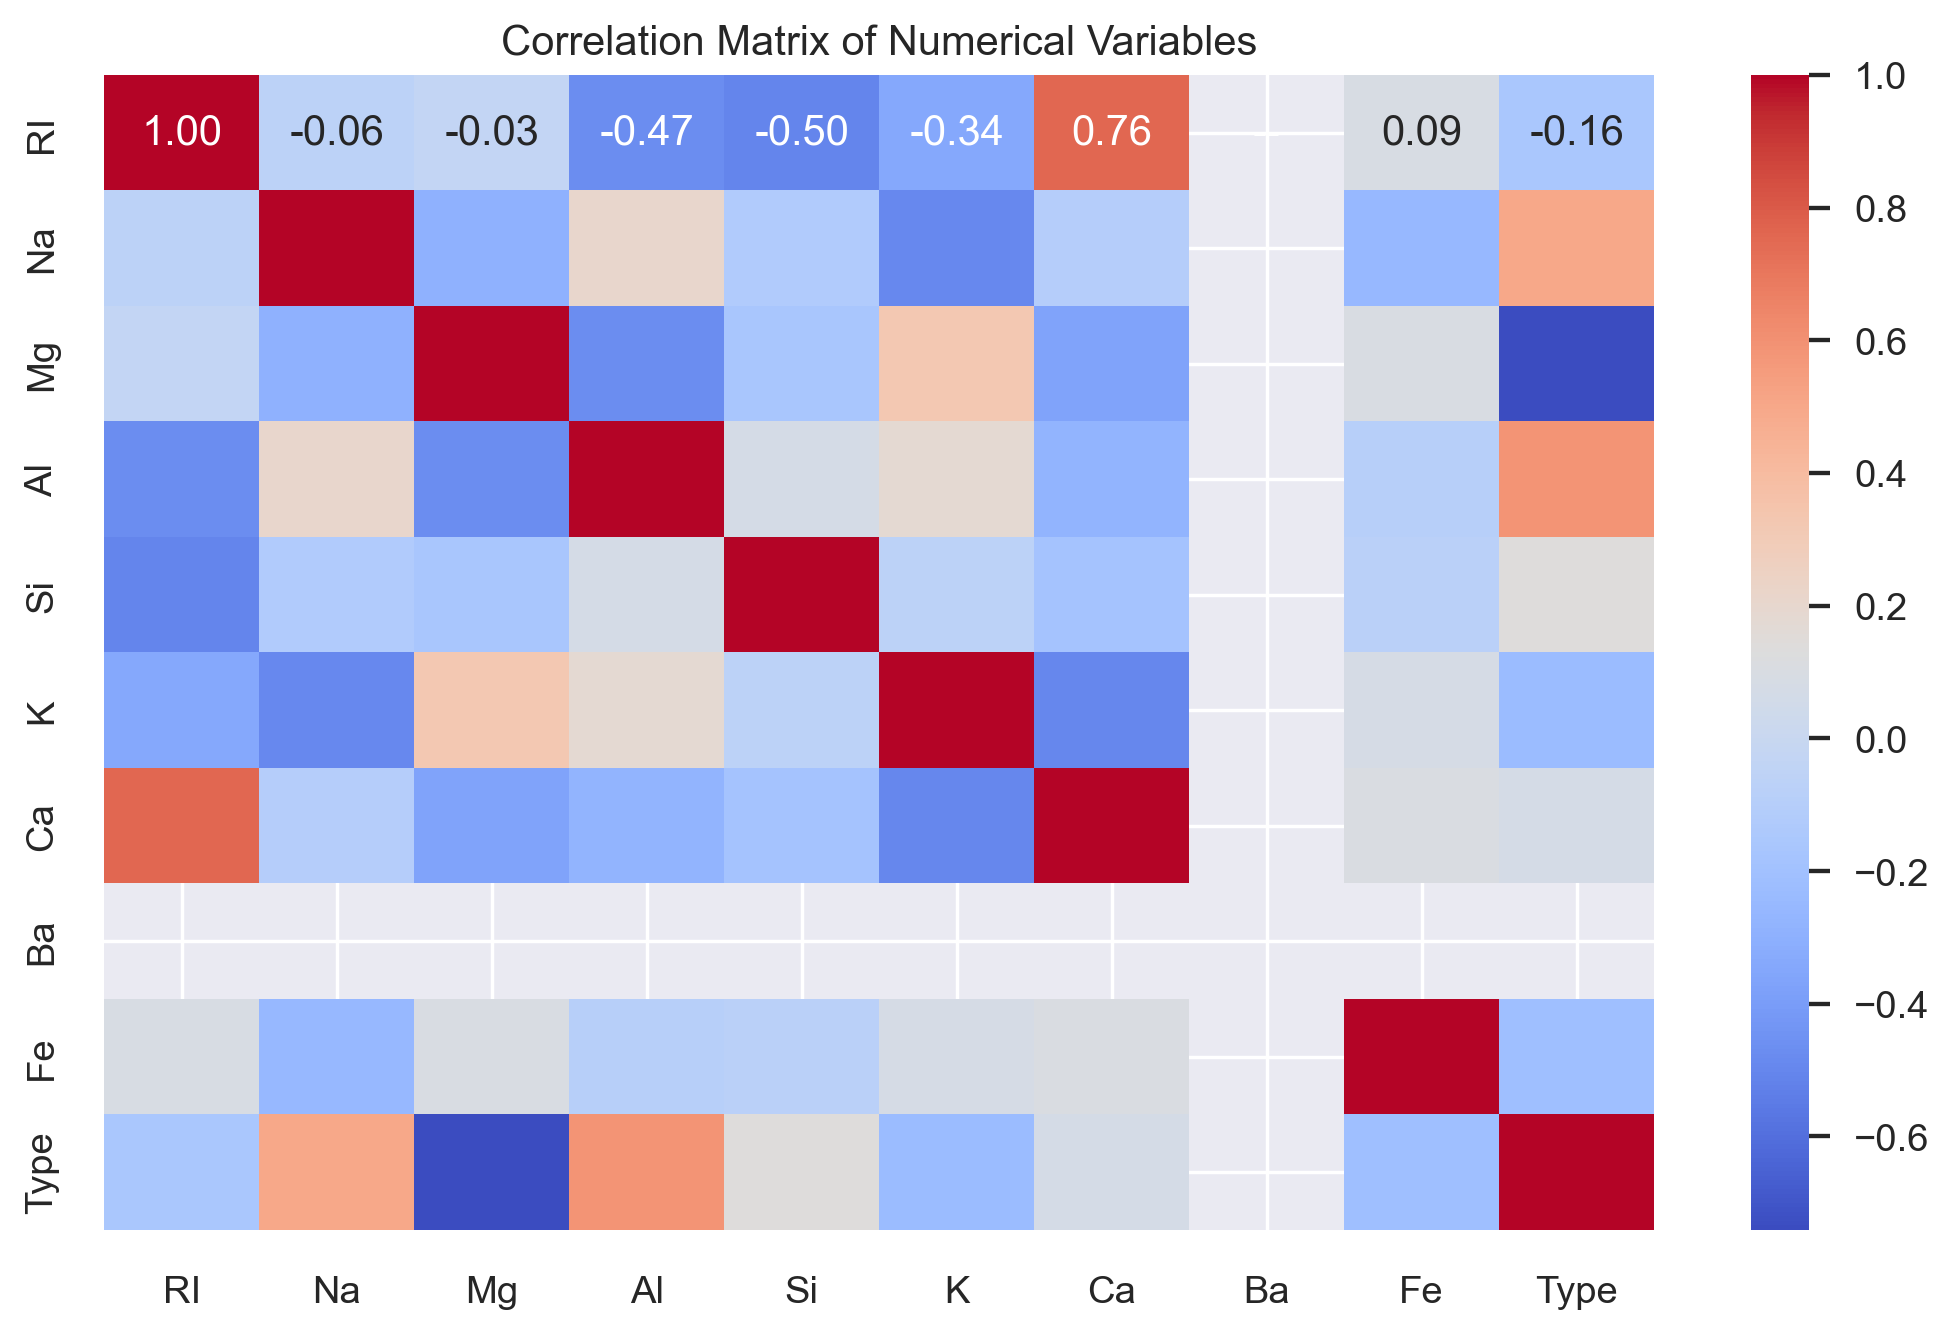

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [13]:
x = df.iloc[:,:-1]
y = df['Type']

In [14]:
test = SelectKBest(score_func=chi2, k = 5)

test.fit(x,y)

SelectKBest(k=5, score_func=<function chi2 at 0x000002A86B55E340>)

In [15]:
univariate = pd.DataFrame(test.scores_).T
univariate
univariate.columns = x.columns
univariate

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.000038,3.744534,99.477967,10.576668,0.104967,8.21458,1.048284,NaN,2.070943


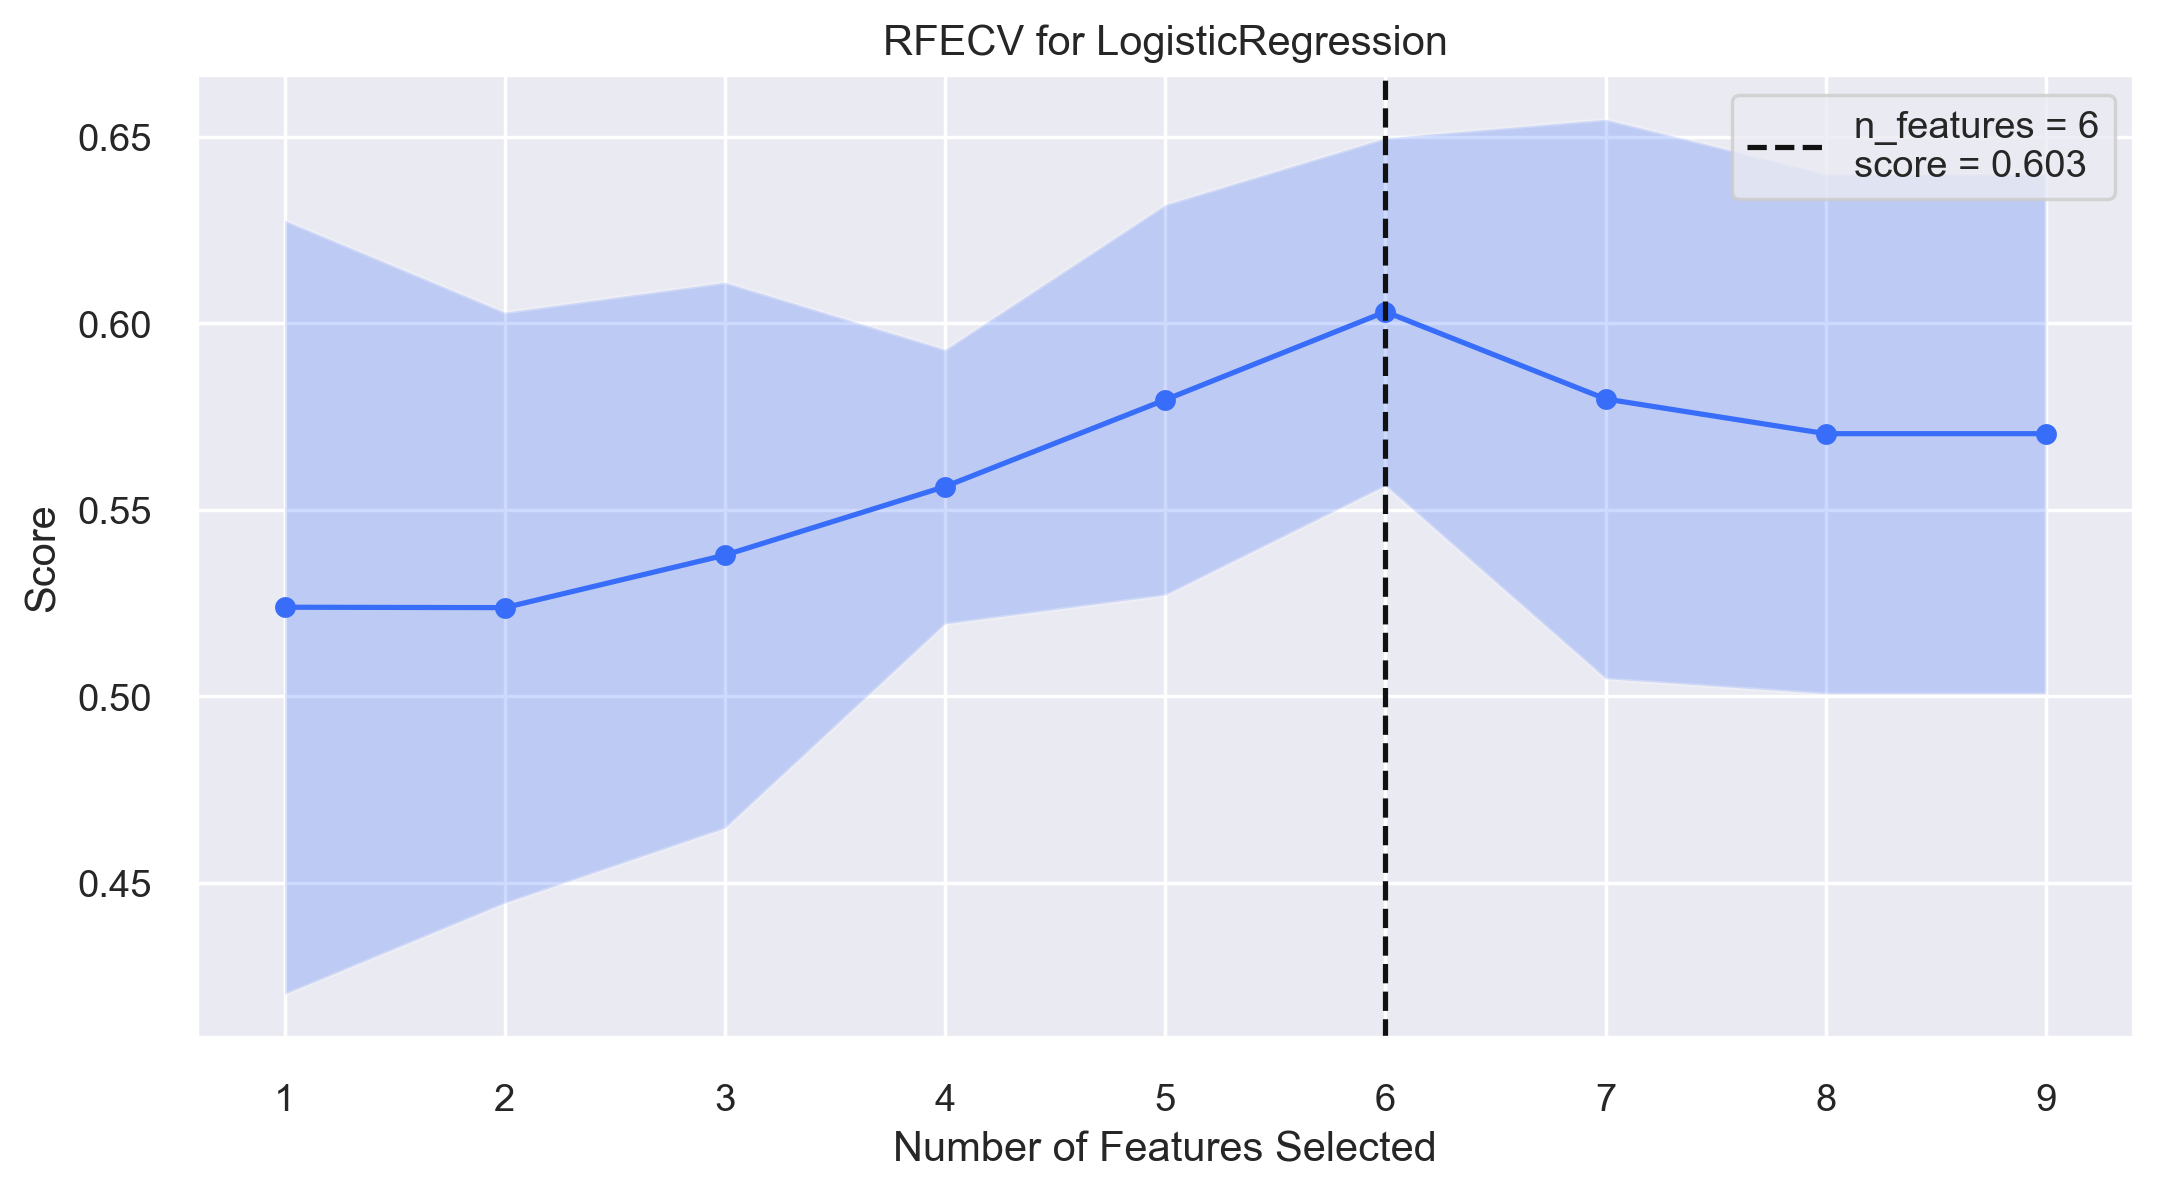

In [16]:
rfe = rfecv(LogisticRegression(),x,y)

In [17]:
rfe.ranking_

array([3, 1, 1, 1, 2, 1, 1, 4, 1])

In [18]:
rfe_Sel = pd.DataFrame({
    'Ranking' : rfe.ranking_,
    'Features' : x.columns
})

In [19]:
rfe_Sel[rfe_Sel['Ranking']==1]

,Ranking,Features
1,1,Na
2,1,Mg
3,1,Al
5,1,K
6,1,Ca
8,1,Fe


In [20]:
dt = DecisionTreeClassifier()

dt.fit(x,y)

DecisionTreeClassifier()

In [21]:
ig_sel = pd.DataFrame({
    'IG': dt.feature_importances_,
    'Features' : x.columns
})

In [22]:
ig_sel

,IG,Features
0,0.161840,RI
1,0.108480,Na
2,0.280327,Mg
3,0.225306,Al
4,0.053586,Si
5,0.039620,K
6,0.063503,Ca
7,0.000000,Ba
8,0.067338,Fe


In [23]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [24]:
X = df.drop(columns=['RI','Na','Si','Fe','Type'])

In [25]:
X

,Mg,Al,K,Ca,Ba
0,4.49,1.10,0.06,8.75,0.0
1,3.60,1.36,0.48,7.83,0.0
2,3.55,1.54,0.39,7.78,0.0
3,3.69,1.29,0.57,8.22,0.0
4,3.62,1.24,0.55,8.07,0.0
...,...,...,...,...,...
209,0.00,2.29,0.08,9.18,0.0
210,0.00,1.99,0.00,8.40,0.0
211,0.00,2.02,0.00,8.44,0.0
212,0.00,1.94,0.00,8.48,0.0


In [26]:
y = df['Type']

In [27]:
sc = StandardScaler()

In [28]:
X = sc.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
knn = KNeighborsClassifier()

In [31]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
ypred = knn.predict(X_test)

In [33]:
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.7251461988304093, 0.7209302325581395)

In [34]:
train_acc = []
test_acc = []

for i in range(1,50):
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    train_acc.append(knn.score(X_train, y_train))
    test_acc.append(knn.score(X_test, y_test))

In [35]:
train_acc

[0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988304093,
 0.7251461988

In [36]:
test_acc

[0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325581395,
 0.7209302325